Doctor Vists Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#Read the dataset
df=pd.read_csv(r"Doctor_Visits_Data.csv")
#Clean the dataset
numeric_cols=df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols=df.select_dtypes(include=['object']).columns
# Remove duplicates
df=df.drop_duplicates()


In [2]:
# Replace numeric nulls with median
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())
# Replace categorical nulls with mode 
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

Data Visualization

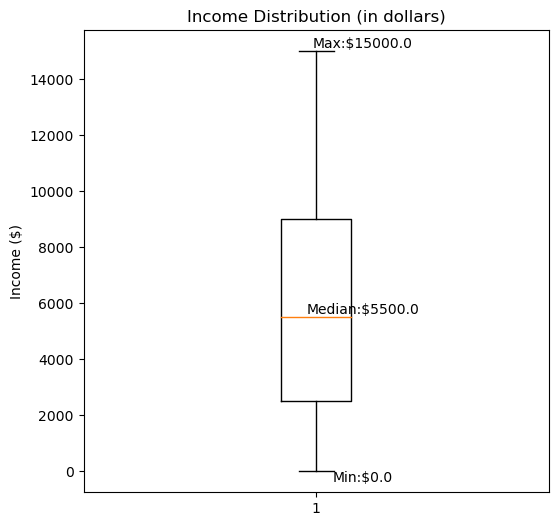

In [5]:
#Visualising income [max,min,median] with annotations using boxplot 
max_income=df['income'].max()*10000
min_income=df['income'].min()*10000
median_income=df['income'].median()*10000
plt.figure(figsize=(6, 6))
plt.boxplot(df['income']*10000)
plt.title('Income Distribution (in dollars)')
plt.ylabel('Income ($)')
plt.text(1.1,max_income,'Max:$'+str(max_income),ha='center',va='bottom')
plt.text(1.1,min_income,'Min:$'+str(min_income),ha='center',va='top')
plt.text(1.1,median_income,'Median:$'+str(median_income),ha='center',va='bottom')
plt.show()

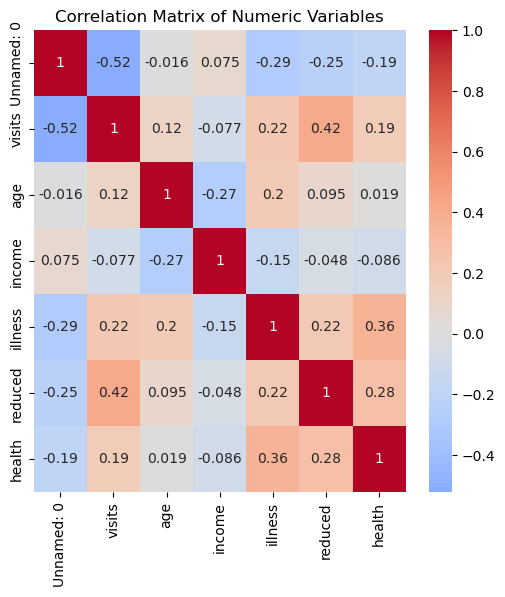

In [6]:
#Visualising Correlation Matrix of Numeric Variables using heatmap
numeric_df=df.select_dtypes(include=['float64','int64'])
plt.figure(figsize=(6,6))
correlation_matrix=numeric_df.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',center=0)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

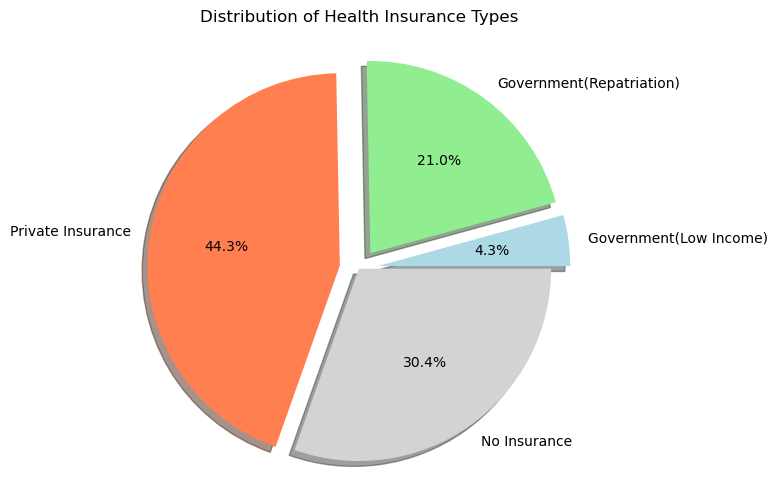

In [7]:
#Visualising Distribution of Health Insurance Type using pie chart
#Convert categorical values to binary
insurance_df=df.copy()
insurance_df['freepoor']=insurance_df['freepoor'].map({'yes': 1, 'no': 0})
insurance_df['private']=insurance_df['private'].map({'yes': 1, 'no': 0})
insurance_df['freerepat']=insurance_df['freerepat'].map({'yes': 1, 'no': 0})
total_people=len(insurance_df)
govt_poor=(insurance_df['freepoor'] == 1).sum()/total_people*100
govt_repat=(insurance_df['freerepat'] == 1).sum()/total_people*100
private_insurance=(insurance_df['private'] == 1).sum()/total_people*100
labels=['Government(Low Income)','Government(Repatriation)','Private Insurance','No Insurance']
sizes=[govt_poor,govt_repat,private_insurance,100-(govt_poor+govt_repat+private_insurance)]
colors=['lightblue', 'lightgreen', 'coral', 'lightgray']
explode=(0.1, 0.1, 0.1, 0)
plt.figure(figsize=(6,6))
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True)
plt.title('Distribution of Health Insurance Types')
plt.axis('equal')
plt.show()

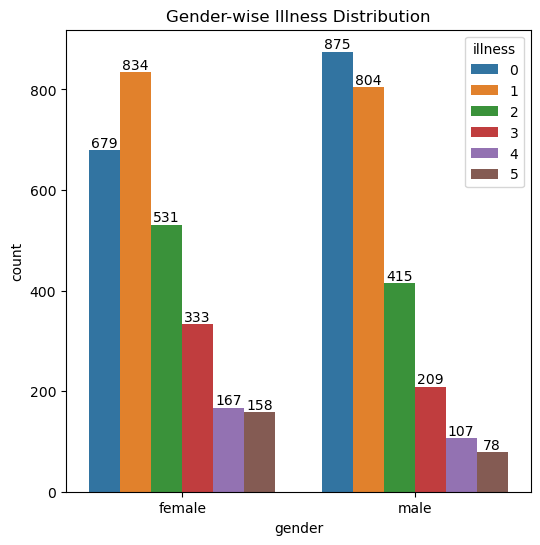

In [8]:
#Visualising Gender-wise Illness Distribution
plt.figure(figsize=(6,6))
ax = sns.countplot(data=df, x='gender', hue='illness')
plt.title('Gender-wise Illness Distribution')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

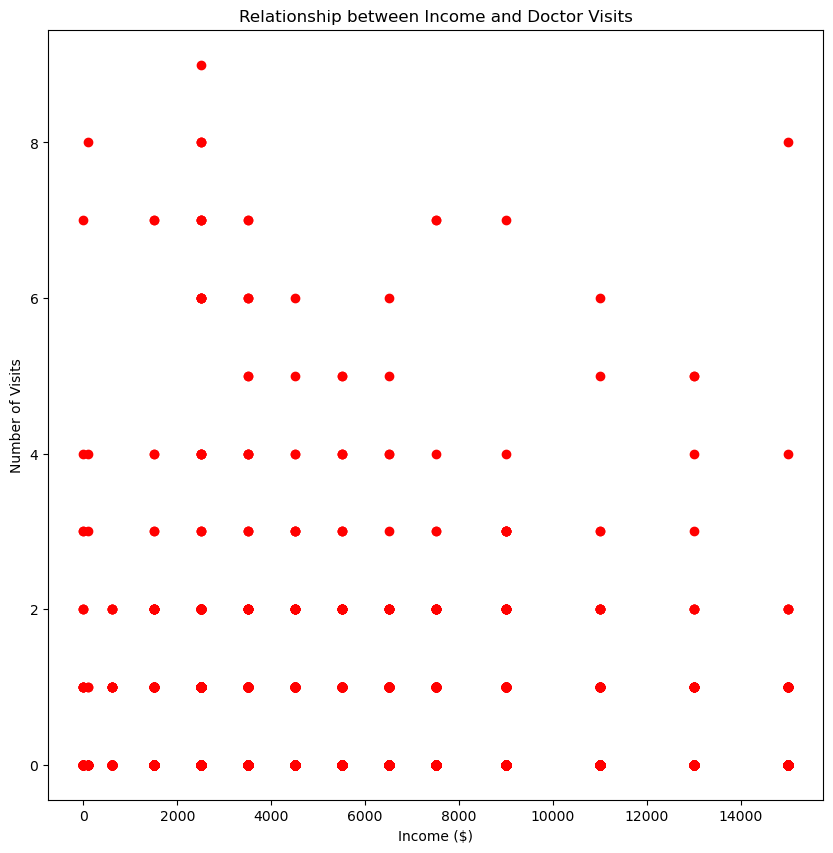

In [9]:
# Create a scatter plot to visualize the relationship between income and visits
plt.figure(figsize=(10, 10))
plt.scatter(x=df['income'] * 10000, y=df['visits'], color='red')
plt.xlabel('Income ($)')
plt.ylabel('Number of Visits')
plt.title('Relationship between Income and Doctor Visits')
plt.show()

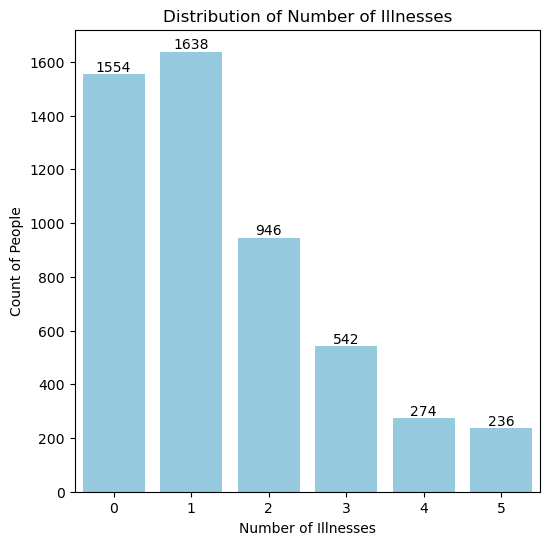

In [10]:
# Create a bar plot for illness counts
plt.figure(figsize=(6,6))
illness_counts = df['illness'].value_counts().sort_index()
sns.barplot(x=illness_counts.index, y=illness_counts.values, color='skyblue')
plt.title('Distribution of Number of Illnesses')
plt.xlabel('Number of Illnesses')
plt.ylabel('Count of People')

# Add value labels on top of each bar
for i, v in enumerate(illness_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()